In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
import random
from datetime import datetime
from PIL import Image
import numpy as np
import torch
import matplotlib.pyplot as plt

sys.path.append('..')

from src.data.transforms import TEST_TRANSFORMS
from src.modeling.model import HCCLF

/Users/alexandrepoupeau/.pyenv/versions/3.11.10/envs/aitt-symb-venv/lib/python3.11/site-packages/torchvision/transforms/v2/_deprecated.py:42: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])`.Output is equivalent up to float precision.
  warnings.warn(


In [3]:
model = HCCLF()

In [5]:
model.load_state_dict(torch.load("../models/keep/model_20250315_234944_47.pt"))

<All keys matched successfully>

In [34]:
model.eval().to("cpu")

HCCLF(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=32768, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=1, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
)

In [35]:
# img = Image.open("/Users/alexandrepoupeau/Downloads/example.png")
img = Image.open("/Users/alexandrepoupeau/Downloads/LOT 90.png")
# img = Image.fromarray(np.full(shape=(256, 256), fill_value=random.randint(0, 255), dtype=np.uint8))

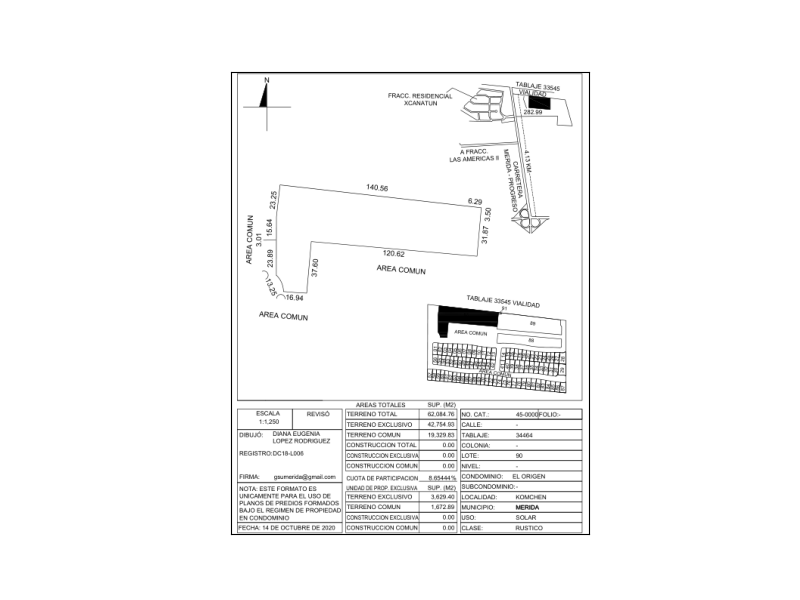

In [36]:
img

In [37]:
tensor: torch.Tensor = TEST_TRANSFORMS(img)

In [38]:
tensor = tensor.unsqueeze(0)

In [39]:
tensor.shape

torch.Size([1, 1, 128, 128])

In [42]:
with torch.no_grad():
    result = model(tensor)

In [52]:
result.numpy()[0][0]

np.float32(0.5047327)